In [1]:
import pandas as pd
import numpy as np
import matplotlib as mb
import seaborn as sns
import sklearn.preprocessing
from sklearn.compose import make_column_transformer

from matplotlib import style
style.use ('dark_background')

In [48]:
db = pd.read_csv('properties_colombia_train.csv', encoding='utf-8')
db

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431)


In [3]:
# Obtenemos información general de cada columna

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [4]:
# Revisamos si hay homogeneidad en determinadas columnas con el fin de analizar si es necesario normalizar


db.ad_type.unique()  # Único valor "Propiedad"
db.operation_type.unique()  # Único valor "venta"
db.l1.unique()      # Único valor "Colombia"
db.operation_type.unique()     # Único valor "Venta"
db.currency.unique()        # Los precios se encuentran en Pesos colombianos, dólares o pueden ser datos vacíos. Es necesario trabajar sobre esta columna para tener una única moneda.


array(['COP', nan, 'USD'], dtype=object)

In [49]:
# Antes de realizar la conversión de moneda se cuentan los valores NaN y 0 de la columna precios. Las propiedades que no tengan estos datos no nos sirven para entrenar el modelo ya que no disponen de una etiqueta. 

db['price'].isna().sum()        # Hay 63 valores NaN y 4 valores iguales a 0. Representan un 0,034% del total del dataset. Se decide eliminar dichas filas.
db['price'].value_counts()[0]


db= db.dropna(subset='price')
#db= db[db['price']!=0]        # Se opta por no eliminar las filas con precio = 0 ya que esos datos faltantes generaban una incompatibilidad con el OneHotEncoder. La variación que esto genera en los resultados es mínima.


In [50]:
# Se convierten a Pesos Colombianos los valores que están en dólares. (1 USD ---- 5069 COP)

db.loc[(db['currency']=='USD'), 'price'] *= 5069

db.loc[db['currency']=='USD']

# Dejamos la columna "Currency" con el valor USD aunque el precio esté convertido a COP ya que puede ayudar al modelo a clasificar correctamente.

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
5902,968218,rbp33S2gwQMUm4uL9uiESg==,Propiedad,2020-08-25,9999-12-31,2020-08-25,4.914310,-73.993189,Colombia,Cundinamarca,...,NaN,NaN,3.801750e+09,USD,NaN,Vendo espectacular casa entre Bogota y Briceño,Espectacular casa entre Bogota- Briceño km 12 ...,Casa,Venta,POINT (-73.9931885 4.9143096)
49196,110,qw+l3GewCFgQ4KH0pxStUA==,Propiedad,2020-10-07,2021-01-22,2020-10-07,10.513831,-75.498685,Colombia,Bolívar,...,NaN,NaN,9.935240e+09,USD,NaN,Exclusive beach house for sale - Manzanillo de...,¡EXCLUSIVE BEACH HOUSE FOR SALE - MANZANILLO D...,Casa,Venta,POINT (-75.4986852407 10.5138313669)
56159,874575,4p1clkPJ5acEDb9cY38Umg==,Propiedad,2020-10-26,2020-10-26,2020-10-26,4.739003,-74.098302,Colombia,Cundinamarca,...,NaN,NaN,4.308650e+09,USD,Mensual,Casa en Venta Costa del Este RAH PA: 20-11172,Viva en una casa espaciosa con terrazas y pati...,Casa,Venta,POINT (-74.098302 4.7390028)
56522,874396,yu6EN/r21XB3FDkuEVqL+A==,Propiedad,2020-10-26,2020-10-26,2020-10-26,4.695757,-74.043894,Colombia,Cundinamarca,...,NaN,NaN,5.155173e+09,USD,Mensual,Apartamento en Venta Santa Maria RAH PA: 20-10683,Majestuoso apartamento a estrenar con la mejor...,Apartamento,Venta,POINT (-74.0438943 4.6957568)
116979,51666,EwDsJaQoCbpejoXGZReUjw==,Propiedad,2020-09-13,2021-01-12,2020-09-13,NaN,NaN,Colombia,Santander,...,NaN,NaN,5.797471e+09,USD,NaN,Villa for sale Bali,Villa for sale Bali<br />\n<br />\nLocation: J...,Finca,Venta,POINT EMPTY
136236,200614,scSKyD9kllWlPnoFwbwOKw==,Propiedad,2020-09-16,2020-10-29,2020-09-16,4.622794,-74.090960,Colombia,Cundinamarca,...,NaN,NaN,3.345540e+11,USD,NaN,Venta Casa Excelente,<br />\n - Calefacción\n- Parrilla\n <br />\n ...,Casa,Venta,POINT (-74.0909602 4.622794)
137025,630538,U1bChe1aBazSg0SKUDfWXA==,Propiedad,2020-08-29,9999-12-31,2020-08-29,12.585979,-81.714549,Colombia,San Andrés Providencia y Santa Catalina,...,NaN,NaN,1.520700e+10,USD,NaN,HOTEL EN VENTA EN LA ISLA DE SAN ANDRÉS,\nUn Hotel Boutique TOTALMENTE frente al mar.\...,Otro,Venta,POINT (-81.7145490646 12.5859785199)
167143,102295,w7sVBDzBykDl7sgZmAQoXw==,Propiedad,2020-08-08,9999-12-31,2020-08-08,10.829302,-75.160260,Colombia,Atlántico,...,NaN,NaN,4.942275e+10,USD,NaN,Lote en venta Vía Barranquilla Cartagena,OPORTUNIDAD DE INVERSIÒN EN EL CARIBE COLOMBIA...,Lote,Venta,POINT (-75.1602602005 10.8293016581)


In [51]:
db[db.id.duplicated(keep=False)]    # No hay id de propiedades repetidas

db['l2'].value_counts()     # Hay 32 provincias

db['l3'].value_counts()     # Hay 293 ciudades

db['l4'].value_counts()     # Hay 58 comunas

db['l5'].value_counts()     # Hay 20 localidades

db['l6'].value_counts()     # Hay 146 barrios

# Estos datos serán luego preprocesados con la herramienta OneHotEncoder para poder procesarlos en el modelo de Machine Learning

Chico Reservado    1135
Cedritos           1053
Santa Barbara      1038
Los Rosales         316
Bella Suiza         274
                   ... 
Capellania            1
Milenta               1
Molinos               1
Lindaraja             1
20 De Julio           1
Name: l6, Length: 146, dtype: int64

In [52]:
# Se obtiene la media del precio de las propiedades. Se considerarán "baratas" (0) las propiedades que estén por debajo de este valor y "caras" (1) las que estén por encima.

db['price'].mean()

645772827.2423463

In [53]:
# Agregamos una columna "Target" al dataframe. En ella se indicará si el valor de la propiedad está por encima (1) o por debajo (0) de la media.

# Para eso primero definimos un proceso

def target_row(row):
    if row['price'] > 645772827.242:
        return 1
    else:
        return 0
    
# Aplicamos el metodo anterior a una nueva columna

db['target'] = db.apply (lambda row: target_row(row), axis=1)


C:\Users\ariel\AppData\Local\Temp\ipykernel_5204\625091051.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['target'] = db.apply (lambda row: target_row(row), axis=1)


In [54]:
# Como ya no es necesaria la columna precio, se elimina.

db = db.drop('price', axis=1)

# Tampoco son necesarias varias columnas que no ayudan a catalogar si una propiedad es barata o cara, o las columnas que solo tienen un único valor. Se eliminan las siguientes columnas

db = db.drop(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l3', 'l4', 'l6', 'title', 'description', 'operation_type', 'geometry'], axis=1)

In [55]:
# Analizamos cuántas propiedades quedaron por arriba del promedio

db['target'].value_counts()      # Un 46243 propiedades de 197486 son "caras". Eso representa un 23,41% del dataset. El dataset está claramente desequilibrado.

0    151243
1     46243
Name: target, dtype: int64

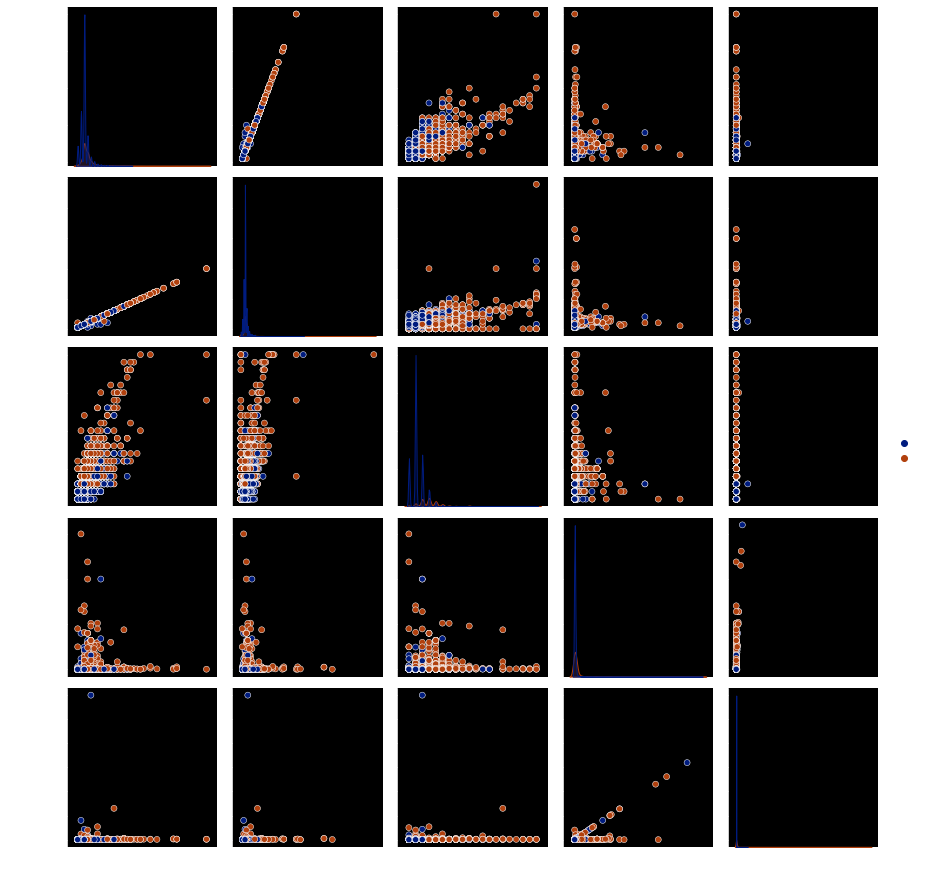

In [230]:
sns.pairplot(db, hue="target", palette='dark')

In [56]:
# Se creará un segundo dataset de entrenamiento con la particularidad de ser equilibrado. Esto supone una mejora en el modelo de predicción.

db_eq = db      

mask = db_eq['target'] == 0

db_eq = pd.concat([db_eq[mask].sample(n=46243), db_eq[~mask]])

db_eq['target'].value_counts()


0    46243
1    46243
Name: target, dtype: int64

In [57]:
db_eq.columns

Index(['l2', 'l5', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'currency', 'price_period', 'property_type',
       'target'],
      dtype='object')

In [59]:
# Se dividen las etiquetas del resto del dataset

X = db_eq.drop('target', axis=1)

y = db_eq['target']


In [60]:
X

,l2,l5,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type
2885,Caldas,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Casa
39338,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,COP,NaN,Apartamento
154772,Valle del Cauca,NaN,NaN,NaN,4.0,NaN,NaN,COP,Mensual,Apartamento
126929,Caldas,NaN,NaN,NaN,1.0,NaN,NaN,COP,Mensual,Apartamento
136913,Cundinamarca,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Apartamento
...,...,...,...,...,...,...,...,...,...,...
197523,Cundinamarca,NaN,NaN,NaN,3.0,NaN,NaN,COP,NaN,Casa
197524,Cundinamarca,Usaquén,NaN,NaN,4.0,NaN,NaN,COP,NaN,Apartamento
197530,Risaralda,NaN,6.0,6.0,NaN,NaN,NaN,COP,NaN,Finca
197531,Antioquia,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Otro


In [61]:
# Dado que los modelos de Machine Learning únicamente procesan números, se deberá implementar un proceso que categorice las columnas de locación l2 y l5. Se usará OneHotEncoder de la librería Sklearn


encoder = sklearn.preprocessing.OneHotEncoder(categories='auto', handle_unknown='error')

encoder.fit(X[['l2', 'l5', 'currency', 'price_period', 'property_type']])

#encoder.fit(X_eq[['l2', 'l3', 'l4', 'l5', 'l6', 'currency', 'price_period', 'property_type']])



OneHotEncoder()

In [62]:
encoder.categories_

[array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar',
        'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar',
        'Chocó', 'Cundinamarca', 'Córdoba', 'Guainía', 'Guaviare', 'Huila',
        'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander',
        'Putumayo', 'Quindío', 'Risaralda',
        'San Andrés Providencia y Santa Catalina', 'Santander', 'Sucre',
        'Tolima', 'Valle del Cauca', 'Vichada'], dtype=object),
 array(['Antonio Nariño', 'Barrios Unidos', 'Bosa', 'Chapinero',
        'Ciudad Bolívar', 'Engativa', 'Fontibón', 'Kennedy',
        'La Candelaria', 'Los Mártires', 'Puente Aranda',
        'Rafael Uribe Uribe', 'San Cristobal', 'Santa Fe', 'Suba',
        'Teusaquillo', 'Tunjuelito', 'Usaquén', 'Usme', nan], dtype=object),
 array(['COP', 'USD', nan], dtype=object),
 array(['Mensual', nan], dtype=object),
 array(['Apartamento', 'Casa', 'Finca', 'Local comercial', 'Lote',
        'Oficina', 'Otro', 'Parqueadero'], dtype=objec

In [63]:
column_trans = make_column_transformer((encoder, ['l2', 'l5', 'currency', 'price_period', 'property_type']), remainder='passthrough')

In [64]:
X = column_trans.fit_transform(X).toarray()

In [65]:
X

array([[ 0.,  0.,  0., ...,  1., nan, nan],
       [ 0.,  1.,  0., ...,  2., nan, nan],
       [ 0.,  0.,  0., ...,  4., nan, nan],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  0., ...,  1., nan, nan],
       [ 0.,  0.,  0., ...,  3., nan, nan]])

In [66]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [67]:
clf = HistGradientBoostingClassifier().fit(X,y)

In [68]:
clf.score(X,y)

0.8191834439807106

In [69]:
# Se importa el dataset de testeo

db_test = pd.read_csv ('properties_colombia_test.csv')

db_test

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,400341,RuyWia5y5aifsVVKmIUSnw==,Propiedad,2020-12-02,2021-08-03,2020-12-02,6.212981,-75.599349,Colombia,Antioquia,...,NaN,NaN,NaN,COP,NaN,Venta de Apartamento La Mota,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta,POINT (-75.5993485451 6.2129806633)
65846,144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,2020-07-27,5.041331,-75.512415,Colombia,Caldas,...,1.0,NaN,NaN,COP,NaN,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)
65847,817321,BFgIYQiaJNz/d9548oqXUg==,Propiedad,2020-11-06,2020-11-06,2020-11-06,5.064733,-75.670570,Colombia,Caldas,...,2.0,NaN,NaN,COP,Mensual,Vende casa campestre en Santagueda _ wasi660842,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta,POINT (-75.67057009 5.06473281)
65848,859339,DSSyKe2ynj2Iqkq1Tz4c0w==,Propiedad,2020-12-14,2020-12-14,2020-12-14,7.138641,-73.127312,Colombia,Santander,...,2.0,NaN,NaN,COP,Mensual,Vendo apto facilidad de pago,Vendo apto bien ubicado 3 habitación 2 baños s...,Apartamento,Venta,POINT (-73.12731171 7.13864078)


In [70]:
# Se realiza una comparación de cuántos datos hay en este dataset comparado con el de entrenamiento. 

db_test['l2'].value_counts()     # Hay 31/32 provincias

db_test['l3'].value_counts()     # Hay 262/293 ciudades

db_test['l4'].value_counts()     # Hay 55/58 comunas

db_test['l5'].value_counts()     # Hay 19/20 localidades

db_test['l6'].value_counts()     # Hay 121/146 barrios


# El tener distintos números de datos provocaría que el OneHotEncoder genere menos columnas para este dataset. 

Chico Reservado     387
Cedritos            368
Santa Barbara       338
Bella Suiza         102
Los Rosales         101
                   ... 
Sotavento             1
San Luis              1
Milenta               1
El Plan               1
Gustavo Restrepo      1
Name: l6, Length: 121, dtype: int64

In [71]:
# Se eliminan las mismas columnas que se le realizó al dataset de entrenamiento:

db_test = db_test.drop(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l3', 'l4', 'l6', 'title', 'description', 'operation_type', 'geometry'], axis=1)

In [72]:
db_test

,l2,l5,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type
0,Cundinamarca,NaN,3.0,3.0,3.0,660.0,350.0,COP,NaN,Casa
1,Antioquia,NaN,NaN,NaN,3.0,NaN,NaN,COP,Mensual,Apartamento
2,Antioquia,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Casa
3,Antioquia,NaN,NaN,NaN,NaN,2793.0,NaN,COP,NaN,Lote
4,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,COP,NaN,Casa
...,...,...,...,...,...,...,...,...,...,...
65845,Antioquia,NaN,3.0,3.0,NaN,NaN,NaN,COP,NaN,Apartamento
65846,Caldas,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Apartamento
65847,Caldas,NaN,NaN,NaN,2.0,NaN,NaN,COP,Mensual,Otro
65848,Santander,NaN,NaN,NaN,2.0,NaN,NaN,COP,Mensual,Apartamento


In [73]:
# Para evitar esto, se vuelve a importar el csv de entrenamiento para luego concatenarlo con el dataset de test.

db_eq 

db_eq = db_eq.drop('target', axis=1)

# Se concatenan ambos db

db_concat = [db_eq , db_test]

db_concat = pd.concat(db_concat)



In [74]:
db_concat


,l2,l5,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type
2885,Caldas,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Casa
39338,Antioquia,NaN,NaN,NaN,2.0,NaN,NaN,COP,NaN,Apartamento
154772,Valle del Cauca,NaN,NaN,NaN,4.0,NaN,NaN,COP,Mensual,Apartamento
126929,Caldas,NaN,NaN,NaN,1.0,NaN,NaN,COP,Mensual,Apartamento
136913,Cundinamarca,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Apartamento
...,...,...,...,...,...,...,...,...,...,...
65845,Antioquia,NaN,3.0,3.0,NaN,NaN,NaN,COP,NaN,Apartamento
65846,Caldas,NaN,NaN,NaN,1.0,NaN,NaN,COP,NaN,Apartamento
65847,Caldas,NaN,NaN,NaN,2.0,NaN,NaN,COP,Mensual,Otro
65848,Santander,NaN,NaN,NaN,2.0,NaN,NaN,COP,Mensual,Apartamento


In [75]:
# Se realiza el OneHotEncoder

#encoder_test = sklearn.preprocessing.OneHotEncoder(categories='auto', handle_unknown='error')

encoder.fit(db_concat[['l2', 'l5', 'currency', 'price_period', 'property_type']])

OneHotEncoder()

In [38]:
encoder.categories_

[array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar',
        'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar',
        'Chocó', 'Cundinamarca', 'Córdoba', 'Guainía', 'Guaviare', 'Huila',
        'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander',
        'Putumayo', 'Quindío', 'Risaralda',
        'San Andrés Providencia y Santa Catalina', 'Santander', 'Sucre',
        'Tolima', 'Valle del Cauca', 'Vichada'], dtype=object),
 array(['Alarcón', 'Altavista', 'Antonia Santos', 'Aranjuez', 'Belén',
        'Buenos Aires', 'Campo Alegre', 'Candelaria', 'Caney', 'Carrizal',
        'Castilla', 'Ciudad Jardín', 'Doce de Octubre', 'El Ingenio',
        'El Limonar', 'El Poblado', 'El Prado', 'El Recreo', 'Guayabal',
        'La América', 'La Flora', 'Las Palmas', 'Laureles', 'Lili',
        'Manrique', 'Mejoras Públicas', 'Norte-Centro Histórico',
        'Nueva Granada', 'Nuevo Horizonte', 'Olaya', 'Palmitas', 'Pance',
        'Paseo de la Castellana', '

In [76]:
column_trans_test = make_column_transformer((encoder, ['l2', 'l5', 'currency', 'price_period', 'property_type']), remainder='passthrough')

In [77]:
X_test = column_trans_test.fit_transform(db_concat).toarray()

In [78]:
X_test

array([[ 0.,  0.,  0., ...,  1., nan, nan],
       [ 0.,  1.,  0., ...,  2., nan, nan],
       [ 0.,  0.,  0., ...,  4., nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  2., nan, nan],
       [ 0.,  0.,  0., ...,  2., nan, nan],
       [ 0.,  1.,  0., ...,  2., nan, nan]])

In [79]:
len(X_test)

158336

In [80]:
X_test2 = np.delete(X_test, slice(0,92486), axis=0)

In [81]:
len(X_test2)

65850

In [82]:
X_test_pred = clf.predict(X_test2)

In [83]:
X_test_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
df_out = X_test_pred.reshape(-1,1)

df_out = pd.DataFrame(df_out, columns=['pred'])

df_out

,pred
0,1
1,1
2,0
3,1
4,0
...,...
65845,0
65846,0
65847,0
65848,0


In [85]:
# Se exporta el dataframe a un archivo csv:

df_out.to_csv('arseraf.csv', sep = ';', index=False)

Medidas del modelo:

Recall = 0.8657
Accuracy = 0.7839

In [228]:
# Se realizan las mismas modificaciones que se le hicieron al dataset de entrenamiento:

db_test = db_test.drop(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'title', 'description', 'operation_type', 'geometry'], axis=1)

In [229]:
#encoder_test = sklearn.preprocessing.OneHotEncoder(categories='auto', handle_unknown='error')

encoder.fit(db_test[['l2', 'l3', 'l4', 'l5', 'l6', 'currency', 'price_period', 'property_type']])

OneHotEncoder()

In [231]:
encoder.categories_

[array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar',
        'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar',
        'Chocó', 'Cundinamarca', 'Córdoba', 'Guainía', 'Guaviare', 'Huila',
        'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander',
        'Putumayo', 'Quindío', 'Risaralda',
        'San Andrés Providencia y Santa Catalina', 'Santander', 'Sucre',
        'Tolima', 'Valle del Cauca', 'Vichada'], dtype=object),
 array(['Abejorral', 'Acacías', 'Acandí', 'Agua de Dios', 'Aguazul',
        'Aipe', 'Albán', 'Alvarado', 'Anapoima', 'Andalucía', 'Anolaima',
        'Anserma', 'Apulo', 'Arauca', 'Arbeláez', 'Arjona', 'Armenia',
        'Baranoa', 'Barbosa', 'Barichara', 'Barrancabermeja',
        'Barranquilla', 'Bello', 'Bochalema', 'Bogotá D.C', 'Bojacá',
        'Bucaramanga', 'Cabrera', 'Cachipay', 'Caicedonia', 'Cajicá',
        'Calarca', 'Caldas', 'Cali', 'Calima', 'Candelaria', 'Caparrapí',
        'Carmen de Apicalá', 'Cartagena', 

In [232]:
column_trans_test = make_column_transformer((encoder, ['l2', 'l3', 'l4', 'l5', 'l6', 'currency', 'price_period', 'property_type']), remainder='passthrough')

In [235]:
X_test = column_trans_test.transform(db_test).toarray()

In [236]:
X_test_pred = clf.predict(X_test)

ValueError: X has 510 features, but HistGradientBoostingClassifier is expecting 569 features as input.